foil activity results uBB plotter

In [2]:
import os
import numpy as np
import sys
import statistics
import matplotlib.font_manager
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde
import seaborn
import json
from matplotlib.pyplot import cm
#plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["font.size"] = 22
plt.rcParams["font.weight"] = "normal"

from collections import Counter
from itertools import count
from random import randint
from pathlib import Path
import math

image_directory = '/Users/ljb841@student.bham.ac.uk/fispact/WORKSHOP/uBB/analysis'

calc_data_directory = '{}/calculated_activities'.format(image_directory)
exp_data_directory = '{}/experimental_activities'.format(image_directory)

In [3]:
flux_norm_mean = 0.02756
flux_norm_error = 0.004

n_per_s_norm_mean = 0.0751237
print(0.02756/(73137.1/199358.77))
n_per_s_error = 0.0751237* np.sqrt((1147.24/199358.77)**2+(0.004/0.02756)**2+(59186.1/73137.1)**2)
#0.02756/(73137.1/(1147.24/199358.77))
#0.027568*(59186.1/73137.1)
#(59186.1/199358.77)

def estimated_10ua_flux(flux):
    return flux*6.24151e13*1.37267e-05
def estimated_10ua_li_n_per_s(flux):
    return flux*6.24151e13*3.28565E-03
print('max flux at 10uA proton current: {:.3e} +- {:.3e} n/cm2/s'.format(estimated_10ua_flux(flux_norm_mean),estimated_10ua_flux(flux_norm_error)))
print('max n/s from lithium at 10uA proton current: {:.3e} +- {:.3e} n/s'.format(estimated_10ua_li_n_per_s(n_per_s_norm_mean),estimated_10ua_li_n_per_s(n_per_s_error)))

isotope_list = [
'$^{56}Mn$',
'$^{196}Au$',
'$^{198}Au$', 
'$^{24}Na$',
'$^{65}Ni$',
'$^{64}Cu$',
'$^{111m}Cd$',
#'$^{117}In$', # cd117 and cd117m both have too long halflives for this to be detected
#'$^{117}Cd$',
'$^{115}Cd$',
'$^{115m}In$',
'$^{116m}In$',
'$^{57}Ni$',
#'$^{58}Co$', # do not use - clash of halflives
'$^{165}Dy$', 
'$^{157}Dy$', 
'$^{92m}Nb$',
'$^{7}Be$ *'] 
#'Sc44m', 
#'Rh102m',
#'Y88']


0.07512367459469954
max flux at 10uA proton current: 2.361e+07 +- 3.427e+06 n/cm2/s
max n/s from lithium at 10uA proton current: 1.541e+10 +- 1.267e+10 n/s


In [13]:
# calibration experiment model (iron foil)

calculated_endfb8_activities = [
1.4440*8.976E+02 ,
0.1498*9.205E+01 ,
0.1498*3.86E+03 ,
0.2334*4.504E+02 ,
0.7877*5.596E+01 ,
0.7877*7.597E+02 ,
1e6              , # reaction missing
#0.1328*8.900E+01 ,
0.1328*1.003E+02 ,
1e6              , # reaction missing
1e6 , # reaction missing in116m product 
1.5845*5.830E+00 ,
0.0435*1.334E+04 ,
0.0435*2.183E+01 ,
1e6              , # reaction missing
(4.110146e-02*1.500E+06) + (1.342088e-02*4.948e6)]

calculated_endfb8_uncertainties = [
1.4440*1.71E+01,
0.1498*0.00E+00,
0.1498*7.79E+01,
0.2334*0.00E+00,
0.7877*0.00E+00,
0.7877*0.00E+00,
0.1328*0.00E+00,
#0.1328*0.00E+00,
0.1328*0.00E+00,
0.6452*0.00E+00,
0.6452*0.00E+00,
1.5845*1.11E-01,
0.0435*0.00E+00,
0.0435*0.00E+00,
0.7317*0.00E+00,
4.110146e-02*0.00E+00]

calculated_irdff2_activities = [
1.4440*8.972E+02,
0.1498*9.350E+01,
0.1498*4.306E+03,
0.5*0.2334*9.043E+02, #    only half the Na24 generated here is from the (n,a) reaction, hence multiplication factor
1e6,        #    reaction missing
0.7877*7.788E+02,
1e6,        #    reaction missing
#1e6,        #    reaction missing
1e6,        #    reaction missing
1e6*0.6452*3210.0877645615906,        #    reaction missing
0.6452*0.33334*7.031E+05,
1.5845*5.584E+00,
1e6,        #   reaction missing,
1e6,        #   reaction missing,
1e6*0.7317*20.127675759159207,        #   reaction missing]
1e6]

calculated_irdff2_uncertainties = [
1.4440*0,
0.1498*0,
0.1498*0,
0.2334*0,
0.7877*0,
0.7877*0,
0.1328*0,
#0.1328*0,
0.1328*0,
0.6452*0,
0.6452*0,
1.5845*0,
0.0435*0,
0.0435*0,
0.7317*0,
4.110146e-02*0]

calculated_tendl21_activities = [
1.4440*8.920E+02 ,
0.1498*8.845E+01 ,
0.1498*3.594E+03 ,
0.2334*4.503E+02 ,
0.7877*8.772E+01 ,
0.7877*7.645E+02 ,
0.1328*3.870E+03 ,
#0.1328*5.086E+01 ,
0.1328*7.802E+01 ,
0.6452*4.379E+03 ,
0.6452*2.769E+05 ,
1.5845*5.624E+00 ,
0.0435*1.299E+04 ,
0.0435*2.406E+01 ,
0.7317*2.479E+01 ,
(4.110146e-02*2.422E+06) + (1.342088e-02*2.123e7)]

calculated_tendl21_uncertainties = [
1.4440*9.14E+01 ,
0.1498*3.71E+00 ,
0.1498*5.34E+01 ,
0.2334*0.00E+00 ,
0.7877*6.44E+00 ,
0.7877*3.22E+01 ,
0.1328*1.54E+02 ,
#0.1328*9.15E+00 ,
0.1328*5.50E+00 ,
0.6452*2.03E+02 ,
0.6452*7.51E+03 ,
1.5845*8.51E-01 ,
0.0435*9.36E+02 ,
0.0435*1.78E+00 ,
0.7317*1.50E+00 ,
(4.110146e-02*1.96E+06) + (1.342088e-02*2.94e6)]


In [341]:
# shielded cell 12 calculations from design_model_2

calculated_endfb8_activities_2 = [
1.4440*9.018E+02 ,
0.1498*9.220E+01 ,
0.1498*5.659E+03 ,
0.2334*4.522E+02 ,
0.7877*5.631E+01 ,
0.7877*8.122E+02 ,
1e6              , # reaction missing
0.1328*1.276E+01 ,
0.1328*1.004E+02 ,
0.1328*1.034E+02 ,
1e6              , # reaction missing
1e6*0.6452*5.160E+05 , # reaction missing in116m product - replaced with in116
1.5845*5.802E+00 ,
1.5845*1.634E+01 ,
0.0435*1.672E+04 ,
0.0435*2.663E+01 ,
1e6              ] # reaction missing

calculated_endfb8_uncertainties_2 = [
1.4440*1.73E+01,
0.1498*0.00E+00,
0.1498*1.11E+02,
0.2334*0.00E+00,
0.7877*0.00E+00,
0.7877*0.00E+00,
0.1328*0.00E+00,
0.1328*0.00E+00,
0.1328*0.00E+00,
0.1328*0.00E+00,
0.6452*0.00E+00,
0.6452*0.00E+00,
1.5845*1.11E-01,
1.5845*6.24E-01,
0.0435*0.00E+00,
0.0435*0.00E+00,
0.7317*0.00E+00]

calculated_tendl21_activities_2 = [
1.4440*8.960E+02,
0.1498*8.861E+01,
0.1498*5.347E+03,
0.2334*4.521E+02,
0.7877*8.845E+01,
0.7877*8.163E+02,
0.1328*3.976E+03,
0.1328*2.161E+01,
0.1328*5.725E+01 ,
0.1328*7.869E+01,
0.6452*4.539E+03,
0.6452*3.889E+05,
1.5845*5.599E+00,
1.5845*1.084E+01,
0.0435*1.629E+04,
0.0435*2.842E+01,
0.7317*2.482E+01]

calculated_tendl21_uncertainties_2 = [
1.4440*9.18E+01,
0.1498*3.76E+00,
0.1498*6.74E+01,
0.2334*0.00E+00,
0.7877*6.50E+00,
0.7877*3.40E+01,
0.1328*1.63E+02,
0.1328*2.64E+00 ,
0.1328*9.96E+00,
0.1328*5.89E+00,
0.6452*2.11E+02,
0.6452*1.04e4,
1.5845*8.47E-01,
1.5845*6.92E-01,
0.0435*1.24E+03,
0.0435*2.01E+00,
0.7317*1.50E+00]

calculated_irdff2_activities_2 = [
1.4440*9.013E+02,
0.1498*9.366E+01,
0.1498*5.554E+03, #or 3.493E+03? check files
0.5*0.2334*9.079E+02, #    only half the Na24 is generated by (n,a) in irdff2
1e6,        #    reaction missing
0.7877*8.282E+02,
1e6,        #    reaction missing
1e6,        #    reaction missing
1e6,        #    reaction missing
1e6,        #    reaction missing
1e6,        #    reaction missing
0.6452*1.024E+06,# or 4.183E+05? check files
1.5845*5.558E+00,
1.5845*1.650E+01,
1e6,        #   reaction missing,
1e6,        #   reaction missing,
1e6]        #   reaction missing]

calculated_irdff2_uncertainties_2 = calculated_irdff2_uncertainties

In [103]:
# calibration experiment model (individual foils)

calculated_endfb8_activities_3 = [
1.4440*9.157E+02 ,
0.1498*8.255E+01 ,
0.1498*1.683E+03 ,
0.2334*4.290E+02 ,
0.7877*5.498E+01 ,
0.7877*6.946E+02 ,
1e6              , # reaction missing
0.1328*7.826E+01 ,
0.1328*8.556E+01 ,
1e6              , # reaction missing
1e6*0.6452*5.160E+05 , # reaction missing
1.5845*5.333E+00 ,
0.0435*1.010E+04 ,
0.0435*2.487E+01 ,
1e6              , # reaction missing
1e6 ]

calculated_endfb8_uncertainties_3 = [
1.4440*1.75E+01,
0.1498*0.00E+00,
0.1498*2.62E+01,
0.2334*0.00E+00,
0.7877*0.00E+00,
0.7877*0.00E+00,
0.1328*0.00E+00,
0.1328*0.00E+00,
0.1328*0.00E+00,
0.6452*0.00E+00,
0.6452*0.00E+00,
1.5845*1.01E-01,
0.0435*0.00E+00,
0.0435*0.00E+00,
0.7317*0.00E+00,
0]

calculated_tendl21_activities_3 = [
1.4440*9.099E+02,
0.1498*7.932E+01,
0.1498*1.418E+03,
0.2334*4.289E+02,
0.7877*8.617E+01,
0.7877*7.025E+02,
0.1328*3.358E+03,
0.1328*4.500E+01,
0.1328*6.376E+01,
0.6452*3.784E+03,
0.6452*3.655E+05,
1.5845*5.141E+00,
0.0435*9.821E+03,
0.0435*2.664E+01,
0.7317*2.123E+01,
4.110146e-02*2.422E+06]

calculated_tendl21_uncertainties_3 = [
1.4440*9.32E+01,
0.1498*3.36E+00,
0.1498*4.64E+01,
0.2334*0.00E+00,
0.7877*6.33E+00,
0.7877*3.16E+01,
0.1328*1.34E+02,
0.1328*8.01E+00,
0.1328*4.76E+00,
0.6452*1.75E+02,
0.6452*9.79E+03,
1.5845*7.78E-01,
0.0435*7.32E+02,
0.0435*1.81E+00,
0.7317*1.28E+00,
4.110146e-02*1.96E+06]

calculated_irdff2_activities_3 = [
1.4440*9.152E+02,
0.1498*8.385E+01,
0.1498*1.546E+03, 
0.5*0.2334*8.614E+02, #    only half the Na24 is generated by (n,a) in irdff2
1e6,        #    reaction missing
0.7877*7.181E+02,
1e6,        #    reaction missing
1e6,        #    reaction missing
1e6,        #    reaction missing
1e6,        #    reaction missing
0.6452*0.33334*9.133E+05, # only 1/3 of in116m generated by the (n,g) path
1.5845*5.104E+00,
1e6,        #   reaction missing,
1e6,        #   reaction missing,
1e6,        #   reaction missing]
1e6, ]

calculated_irdff2_uncertainties_3 = calculated_irdff2_uncertainties

In [14]:
calculated_flux_uncertainty_frac = flux_norm_error/flux_norm_mean

def total_calculated_uncerts(calc_fispact_uncerts,calc_activities):
    calculated_uncertainties_frac = []
    for i in np.linspace(0,len(calc_activities)-1,len(calc_activities)):
        frac_fispact_uncerts = calc_fispact_uncerts[int(i)]/calc_activities[int(i)]
        squares_calc_uncerts = frac_fispact_uncerts**2 + calculated_flux_uncertainty_frac**2 
        calculated_uncertainties_frac.append(np.sqrt((squares_calc_uncerts)))
    return calculated_uncertainties_frac

print(isotope_list[14],calculated_tendl21_activities[14])

print(total_calculated_uncerts(calculated_tendl21_uncertainties,calculated_tendl21_activities)[14])

$^{7}Be$ * 384473.01852
0.34424917141240624


In [21]:
experimental_peak_activities = [1281.6313909016553
,1238.766100656416
#,1193.8655468859515

,8.270765467608875

,960.8939910078642
,877.0142237553737

,109.2710271541307
#,106.63977496713139

,49.628050965629974
,73.52967761659473

,1492.3308614824552

,563.5118207419483
#,471.7878387871482

,27.014523062603356
#,28.118728818997173

,15.914748446854595
,9.888013592259544

,21.90596343411301
,14.771206791772778

,2279.427750672511

,208534.82706103564 #41378.73065405423
,265728.9953217923   #38762.66448009441
,158472.07645546534  #29763.84252971312
#220949.1339881701   ,51331.36901267503
,128066.83390143998  #37193.911888678114

,9.269413147460252
,9.25141912197904

,47.34726875490932
,54.95960357465037

#,1519.208184329057
,2554.872238236883
,2711.1954526787263
,2358.502989645146
,2256.5413441618052

,3.70493860906988

,16.612469829125715]

experimental_peak_uncertainties = [11.660493101579306
,32.77553122602664
#,48.13973979378837
,1.777828091168263
,9.041561206824689
,172.27065109480554
,1.2577590628499893
#,1.6789777026545345
,6.5772115737581895
,13.1042989811753
,203.4996629294257
,5.161813235724429
#,7.654134768034506
,2.4120109877324425
#,2.0380896809838247
,2.9068033692885105
,7.017299968700321
,2.498048461784817
,6.462402971400591
,38.85388211373598

, 2100.7286050401144
,2885.787558239154 
, 2329.310540825226 
#7182.658993352385 
, 7876.914051678526 

,0.2923260082940725
,0.8663536301518835
,0.11389148039705696
,7.132162295946995
#,25.87653515522103
,161.76099832412294
,270.2286814827646
,297.0228652626571
,282.462168255219
,0.23165267795240016
,0.3461810739487442]

def ave_activities(list):
    return statistics.mean(list)
def ave_uncertainties(list):
    squares = []
    for i in list:
        squares.append(i**2)
    return np.sqrt(np.sum(squares))/len(list)

experimental_activities = [ave_activities(experimental_peak_activities[0 :0 +2]),
                           ave_activities(experimental_peak_activities[2 :2 +1]),
                           ave_activities(experimental_peak_activities[3 :3 +2]),
                           ave_activities(experimental_peak_activities[5 :5 +1]),
                           ave_activities(experimental_peak_activities[6 :6 +2]),
                           ave_activities(experimental_peak_activities[8 :8 +1]),
                           ave_activities(experimental_peak_activities[9 :9 +1]),
                           ave_activities(experimental_peak_activities[10:10+1]),
                           ave_activities(experimental_peak_activities[11:11+2]),
                           ave_activities(experimental_peak_activities[13:13+2]),
                           ave_activities(experimental_peak_activities[15:15+1]),
                           ave_activities(experimental_peak_activities[16:16+4]),
                           ave_activities(experimental_peak_activities[20:20+2]),
                           ave_activities(experimental_peak_activities[22:22+2]),
                           ave_activities(experimental_peak_activities[24:24+4]),
                           ave_activities(experimental_peak_activities[28:28+1]),
                           ave_activities(experimental_peak_activities[29:29+1]),
                           ]
experimental_uncertainties = [ave_uncertainties(experimental_peak_uncertainties[0 :0 +2]),
                              ave_uncertainties(experimental_peak_uncertainties[2 :2 +1]),
                              ave_uncertainties(experimental_peak_uncertainties[3 :3 +2]),
                              ave_uncertainties(experimental_peak_uncertainties[5 :5 +1]),
                              ave_uncertainties(experimental_peak_uncertainties[6 :6 +2]),
                              ave_uncertainties(experimental_peak_uncertainties[8 :8 +1]),
                              ave_uncertainties(experimental_peak_uncertainties[9 :9 +1]),
                              ave_uncertainties(experimental_peak_uncertainties[10:10+1]),
                              ave_uncertainties(experimental_peak_uncertainties[11:11+2]),
                              ave_uncertainties(experimental_peak_uncertainties[13:13+2]),
                              ave_uncertainties(experimental_peak_uncertainties[15:15+1]),
                              ave_uncertainties(experimental_peak_uncertainties[16:16+4]),
                              ave_uncertainties(experimental_peak_uncertainties[20:20+2]),
                              ave_uncertainties(experimental_peak_uncertainties[22:22+2]),
                              ave_uncertainties(experimental_peak_uncertainties[24:24+4]),
                              ave_uncertainties(experimental_peak_uncertainties[28:28+1]),
                              ave_uncertainties(experimental_peak_uncertainties[29:29+1]),
                              ]


def c_over_e(calculated_activities):
    c_over_e_array = []
    for i in np.linspace(0,len(experimental_activities)-1,17):
        c_over_e =  calculated_activities[int(i)]/experimental_activities[int(i)]
        c_over_e_array.append(c_over_e)
    return c_over_e_array

def c_over_e_uncerts(c_over_e,calculated_uncertainties_frac):
    c_over_e_uncerts = []
    for i in np.linspace(0,len(experimental_activities)-1,17):
        c_error = calculated_uncertainties_frac[int(i)]
        e_error = experimental_uncertainties[int(i)]/experimental_activities[int(i)]
        #ce_error =  np.sqrt( c_error**2 + e_error**2 ) * c_over_e[int(i)]
        ce_error =  ( c_error + e_error ) * c_over_e[int(i)]
        c_over_e_uncerts.append(ce_error)
    return c_over_e_uncerts



In [15]:
experimental_activities = [
1283.5748064185852
,9.56701857731642
,1059.8534636660463
,109.78571243006984
,47.354279028165536
,976.9745223250458
,564.0136821965442
#,15.914748446854595
,24.055053741543887
,3925.6667358315044
,225978.3770850294
,8.641203390990839
,1480.475164225852
,3.545378049582069
,16.443880490456756
,199358.7712541107]

experimental_uncertainties = [
11.505019860224916
,1.0468470175786961
,15.256182909717403
,1.2092403652867434
,5.588082663030442
,158.1728263407352
,4.923370766254835
#,2.9068033692885105
,1.7118933951037367
,35.22751978312062
,1950.6765618229635
,0.12161693661394514
,15.892505341164915
,0.1323696495059722
,0.28527178050358687
,1147.2464970510382]

# experimental_activities_root = [
# 1280.6
# ,9.724
# ,961.3917
# ,109.6037
# ,44.844
# ,947.856
# ,562.388
# #,15.914748446854595
# ,24.3848
# ,3925.6667358315044
# ,225978.3770850294
# ,8.641203390990839
# ,2154.038
# ,3.239
# ,16.3
# ,199358.7712541107]
# 
# experimental_uncertainties_root = [
# 11.6
# ,1.144
# ,8.9088
# ,1.204
# ,6.458
# ,188.35
# ,4.9537
# #,2.9068033692885105
# ,1.787
# ,35.22751978312062
# ,1950.6765618229635
# ,0.12161693661394514
# ,92.061
# ,0.136
# ,0.285
# ,1147.2464970510382]



def c_over_e(calculated_activities):
    c_over_e_array = []
    for i in np.linspace(0,len(experimental_activities)-1,len(experimental_activities)):
        c_over_e =  calculated_activities[int(i)]/experimental_activities[int(i)]
        c_over_e_array.append(c_over_e)
    return c_over_e_array

def c_over_e_uncerts(calculated_uncertainties_frac):
    c_over_e_uncerts = []
    for i in np.linspace(0,len(experimental_activities)-1,len(experimental_activities)):
        c_error = calculated_uncertainties_frac[int(i)]
        e_error = experimental_uncertainties[int(i)]/experimental_activities[int(i)]

        ce_error =  np.sqrt( c_error**2 + e_error**2 )
        #ce_error =  np.sqrt( c_error**2 + e_error**2 ) * c_over_e[int(i)]
        #ce_error =  ( c_error + e_error ) * c_over_e[int(i)]

        c_over_e_uncerts.append(ce_error)
    return c_over_e_uncerts

print(experimental_uncertainties[14]/experimental_activities[14])
print(experimental_uncertainties[13]/experimental_activities[13])

print('be7 results:')
print(c_over_e(calculated_tendl21_activities)[14],c_over_e_uncerts(total_calculated_uncerts(calculated_tendl21_uncertainties,calculated_tendl21_activities))[14])
print(c_over_e(calculated_endfb8_activities)[14],c_over_e_uncerts(total_calculated_uncerts(calculated_endfb8_uncertainties,calculated_endfb8_activities))[14])

0.005754682825511157
0.01734820322180917
be7 results:
1.9285482956249527 0.34429726747761225
0.6423529972341735 0.14525192209330895


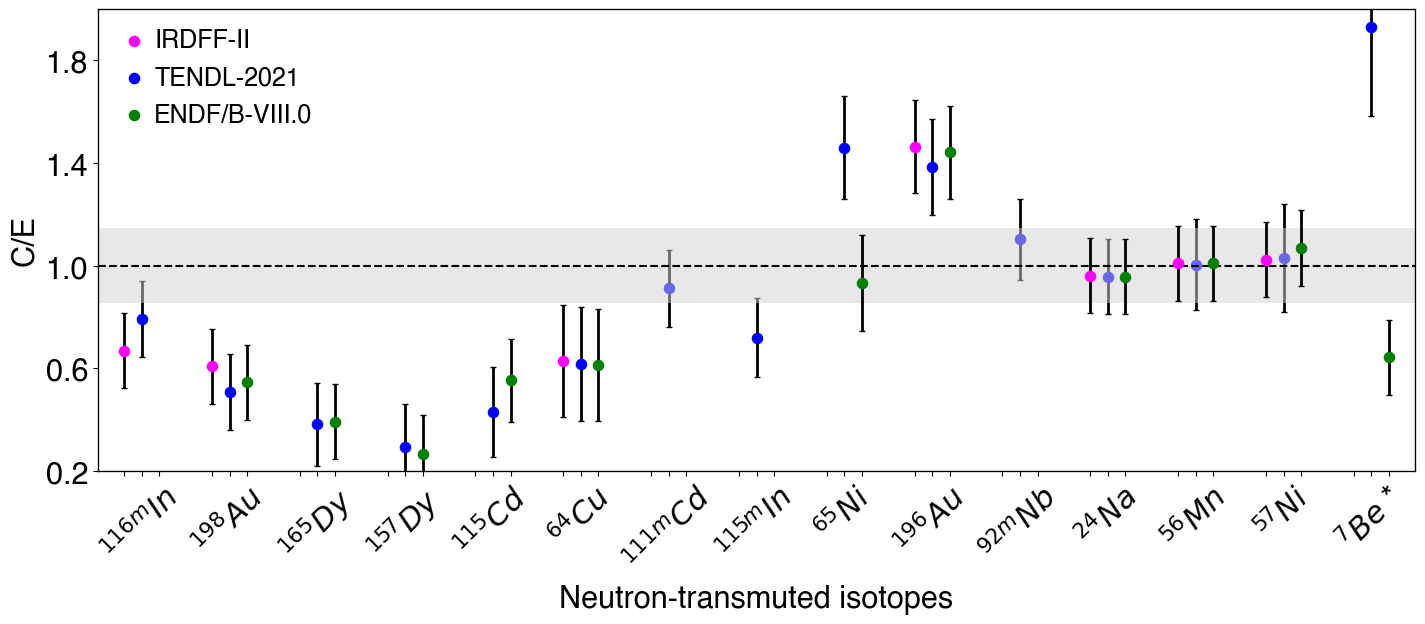

In [16]:
# PLOTTING 

#new_order = [10,2,7,12, 13,8,5,6, 4,9,1,14,3,0,11,15]
#new_order = [10,2,12,7,13, 8,5,6,4, 9,1,14,3,0,11,15]
new_order = [9,2,11,12, 7,5,6,  8,4,1,13,3,0,10,14]

new_isotope_list = [isotope_list[i] for i in new_order]
new_ce_results    = [c_over_e(calculated_tendl21_activities)[i] for i in new_order]
ce_results_irdff  =  [c_over_e(calculated_irdff2_activities)[i] for i in new_order]
ce_results_endfb8 =  [c_over_e(calculated_endfb8_activities)[i] for i in new_order]

new_ce_errors =     [c_over_e_uncerts(total_calculated_uncerts(calculated_tendl21_uncertainties,calculated_tendl21_activities))[i] for i in new_order]
ce_errors_irdff =   [c_over_e_uncerts(total_calculated_uncerts(calculated_irdff2_uncertainties, calculated_irdff2_activities ))[i] for i in new_order]
ce_errors_endfb8 =  [c_over_e_uncerts(total_calculated_uncerts(calculated_endfb8_uncertainties, calculated_endfb8_activities ))[i] for i in new_order]


fig, ax1 = plt.subplots()
ax1.set_xlabel('Neutron-transmuted isotopes') 
ax1.set_ylabel('C/E')
ax1.tick_params(axis='y')
ax1.set_xticks(np.arange(0, len(new_order), step=1))

#ax1.set_xscale("log")
ax1.set_ylim(0.2,2.0)
#ax1.set_ylim(0,4)
ax1.set_yticks([0.2,0.6,1,1.4,1.8])
#ax1.set_yscale("log")

ax1.scatter(new_isotope_list, new_ce_results, s=40 , c='b', linewidth=2,label='TENDL-2021')
ax1.errorbar(new_isotope_list,new_ce_results,new_ce_errors,fmt='none',lw=2,capsize=2,color='Black',zorder=-1)
ax1.set_xlim(-0.5,len(new_order)-0.5)

ax2 = ax1.twiny()
ax2.scatter(new_isotope_list, ce_results_irdff, s=40 , c='magenta', linewidth=2,label='IRDFF-II')
ax2.errorbar(new_isotope_list,ce_results_irdff,ce_errors_irdff,fmt='none',lw=2,capsize=2,color='black',zorder=-1)
ax2.tick_params(top=False, labeltop=False, bottom=True, labelbottom=False)
ax2.set_xlim(-0.3,len(new_order)-0.3)

ax3 = ax1.twiny()
ax3.scatter(new_isotope_list, ce_results_endfb8, s=40 , c='green', linewidth=2,label='ENDF/B-VIII.0')
ax3.errorbar(new_isotope_list,ce_results_endfb8,ce_errors_endfb8,fmt='none',lw=2,capsize=2,color='black',zorder=-1)
ax3.tick_params(top=False, labeltop=False, bottom=True, labelbottom=False)
ax3.set_xlim(-0.7,len(new_order)-0.7)

ax1.plot([-1,17], np.ones(2), 'Black', ls='--',linewidth=1.5)
ax1.fill_between([-1,17], 1-0.14513788, 1+0.14513788,facecolor='lightgrey',alpha=0.5)
#ax1.plot([-1,17], np.ones(2)*(73137.1/199358.77), 'Black', ls=':',linewidth=1.5)

ax1.set_xticklabels(new_isotope_list,rotation=45)

#ax1.grid(which='major')
#ax1.legend(['$^{7}Be$ flux','$^{56}Mn$, $^{24}Na$ flux'],loc="upper left", bbox_to_anchor=(1, 1),handlelength=0,markerscale=0, labelspacing=8.8,borderaxespad=0, frameon=False,fontsize=16)
ax1.legend(loc="upper left", bbox_to_anchor=(0.02, 0.90),handlelength=0,borderaxespad=0, frameon=False,fontsize=18, fancybox=False,facecolor='white',framealpha=1)
ax2.legend(loc="upper left", bbox_to_anchor=(0.02, 0.98),handlelength=0,borderaxespad=0, frameon=False,fontsize=18, fancybox=False,facecolor='white',framealpha=1)
ax3.legend(loc="upper left", bbox_to_anchor=(0.02, 0.82),handlelength=0,borderaxespad=0, frameon=False,fontsize=18, fancybox=False,facecolor='white',framealpha=1)

fig.set_size_inches((17, 6))
fig.savefig(os.path.join(image_directory, 'C_E_plot_alllibraries_test.png'), transparent=False, bbox_inches='tight')

In [196]:
# weighted average C/E calcs

print(new_ce_results[:6])
print(new_ce_errors)

def weighted_ce(ce_value_array,ce_error_array):
    weights = []
    weighted_values = []
    for i in np.linspace(0,len(ce_value_array)-1,len(ce_value_array)):
        iterator = int(i)
        weight = 1/((ce_error_array[iterator])**2)
        weighted_value = weight*ce_value_array[iterator]
        weights.append(weight)
        weighted_values.append(weighted_value)
    summed_weights = np.sum(weights)
    summed_weighted_values = np.sum(weighted_values)
    weighted_ce_result = summed_weighted_values/summed_weights
    weighted_ce_error = 1/np.sqrt(summed_weights)
    print(weighted_ce_result,weighted_ce_error)

weighted_ce(new_ce_results[:6],new_ce_errors[:6])


[0.790588384183221, 0.5079770161223351, 0.3816781352731947, 0.2952040615593518, 0.4307226294866308, 0.6163893082563368]
[0.14790235010126873, 0.1466048174142577, 0.16239526958202924, 0.1671294792439118, 0.17634926274731916, 0.2214742494708136, 0.15074716632189214, 0.20094828069553297, 0.15262555245567333, 0.18654124458984753, 0.15819992201600597, 0.1455552295125976, 0.1778895756116705, 0.21014174312226808, 0.8221808465909777]
0.509070040725655 0.06765057578003168
